# python层次聚类实现
参考英文文档：https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
参考中文文档：https://www.jiqizhixin.com/articles/2020-11-12-2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
data.shape

(440, 8)

In [30]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)

data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


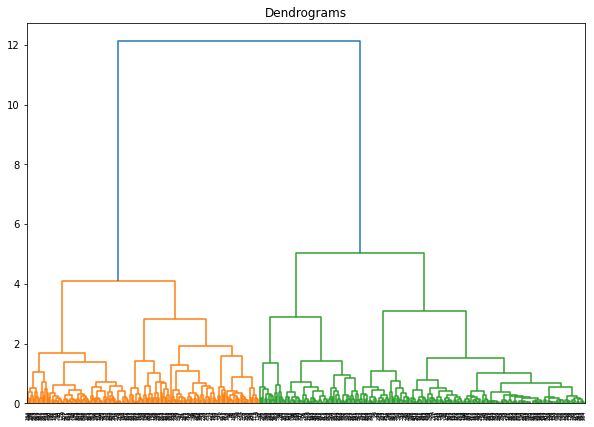

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [32]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

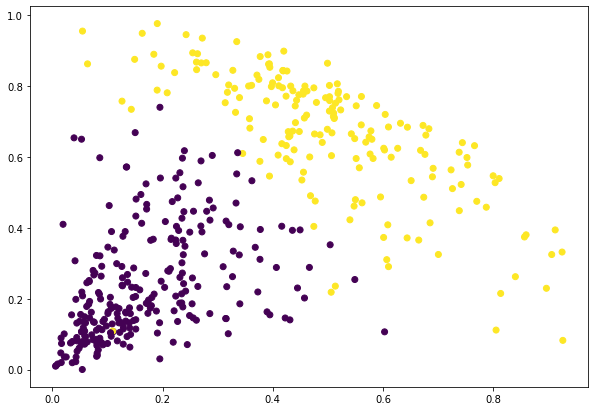

In [33]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'], c=cluster.labels_)

# scipy实现

In [34]:
from scipy.cluster.hierarchy import linkage
Z = linkage(data_scaled, method='ward', metric='euclidean')
print(Z.shape)
print(Z[: 5])

(439, 4)
[[8.30000000e+01 2.82000000e+02 1.53464710e-02 2.00000000e+00]
 [1.50000000e+02 3.36000000e+02 1.80052884e-02 2.00000000e+00]
 [2.58000000e+02 2.73000000e+02 1.99150754e-02 2.00000000e+00]
 [1.14000000e+02 2.17000000e+02 2.23826721e-02 2.00000000e+00]
 [2.20000000e+02 2.39000000e+02 2.25276653e-02 2.00000000e+00]]


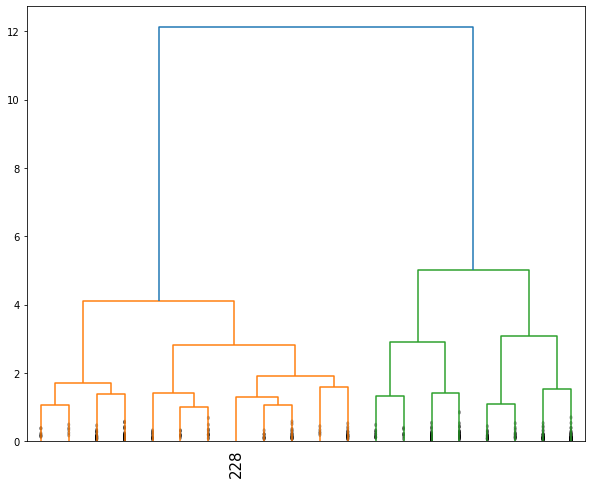

In [35]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=15,
           show_contracted=True)
plt.show()

In [39]:
from scipy.cluster.hierarchy import fcluster
# 根据临界距离返回聚类结果
d = 10
labels_1 = fcluster(Z, t=d, criterion='distance')
print(labels_1)  # 打印聚类结果
print(len(set(labels_1)))  # 看看在该临界距离下有几个 cluster

[1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2
 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1 2 2 2 2 2
 1 2 2 1 2 1 2 1 1 2 2 1 1 2 2 2 2 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 1 2 2
 2 2 2 1 2 1 2 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1
 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1
 2 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2
 2 2 2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2
 2 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 1 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2
 1 2 2 2 2 2 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 2 1 2 2 2 2
 2 2 1 2 2 2 1 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 1 2 1]
2


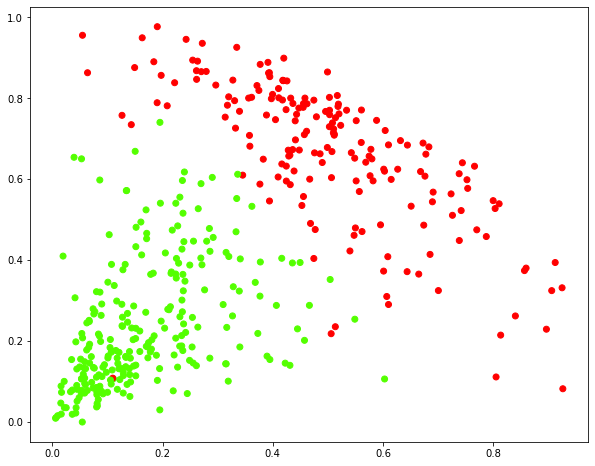

In [40]:
# 聚类的结果可视化，相同的类的样本点用同一种颜色表示
plt.figure(figsize=(10, 8))
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=labels_1,cmap='prism')
plt.show()